In [338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [340]:
df = pd.read_csv('used_car_price_dataset_extended.csv')

In [342]:
df.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,NaN,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,NaN,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes


In [344]:
df.shape

(10000, 12)

In [346]:
df.duplicated().sum()

0

In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make_year           10000 non-null  int64  
 1   mileage_kmpl        10000 non-null  float64
 2   engine_cc           10000 non-null  int64  
 3   fuel_type           10000 non-null  object 
 4   owner_count         10000 non-null  int64  
 5   price_usd           10000 non-null  float64
 6   brand               10000 non-null  object 
 7   transmission        10000 non-null  object 
 8   color               10000 non-null  object 
 9   service_history     7962 non-null   object 
 10  accidents_reported  10000 non-null  int64  
 11  insurance_valid     10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


In [350]:
df.isnull().sum()

make_year                0
mileage_kmpl             0
engine_cc                0
fuel_type                0
owner_count              0
price_usd                0
brand                    0
transmission             0
color                    0
service_history       2038
accidents_reported       0
insurance_valid          0
dtype: int64

In [352]:
df['service_history'].fillna(df['service_history'].mode()[0],inplace = True)

C:\Users\yuvar\AppData\Local\Temp\ipykernel_23164\3423013264.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['service_history'].fillna(df['service_history'].mode()[0],inplace = True)


In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make_year           10000 non-null  int64  
 1   mileage_kmpl        10000 non-null  float64
 2   engine_cc           10000 non-null  int64  
 3   fuel_type           10000 non-null  object 
 4   owner_count         10000 non-null  int64  
 5   price_usd           10000 non-null  float64
 6   brand               10000 non-null  object 
 7   transmission        10000 non-null  object 
 8   color               10000 non-null  object 
 9   service_history     10000 non-null  object 
 10  accidents_reported  10000 non-null  int64  
 11  insurance_valid     10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


In [356]:
df.isnull().sum()

make_year             0
mileage_kmpl          0
engine_cc             0
fuel_type             0
owner_count           0
price_usd             0
brand                 0
transmission          0
color                 0
service_history       0
accidents_reported    0
insurance_valid       0
dtype: int64

In [362]:
df.head(5)

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,Full,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,Full,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes


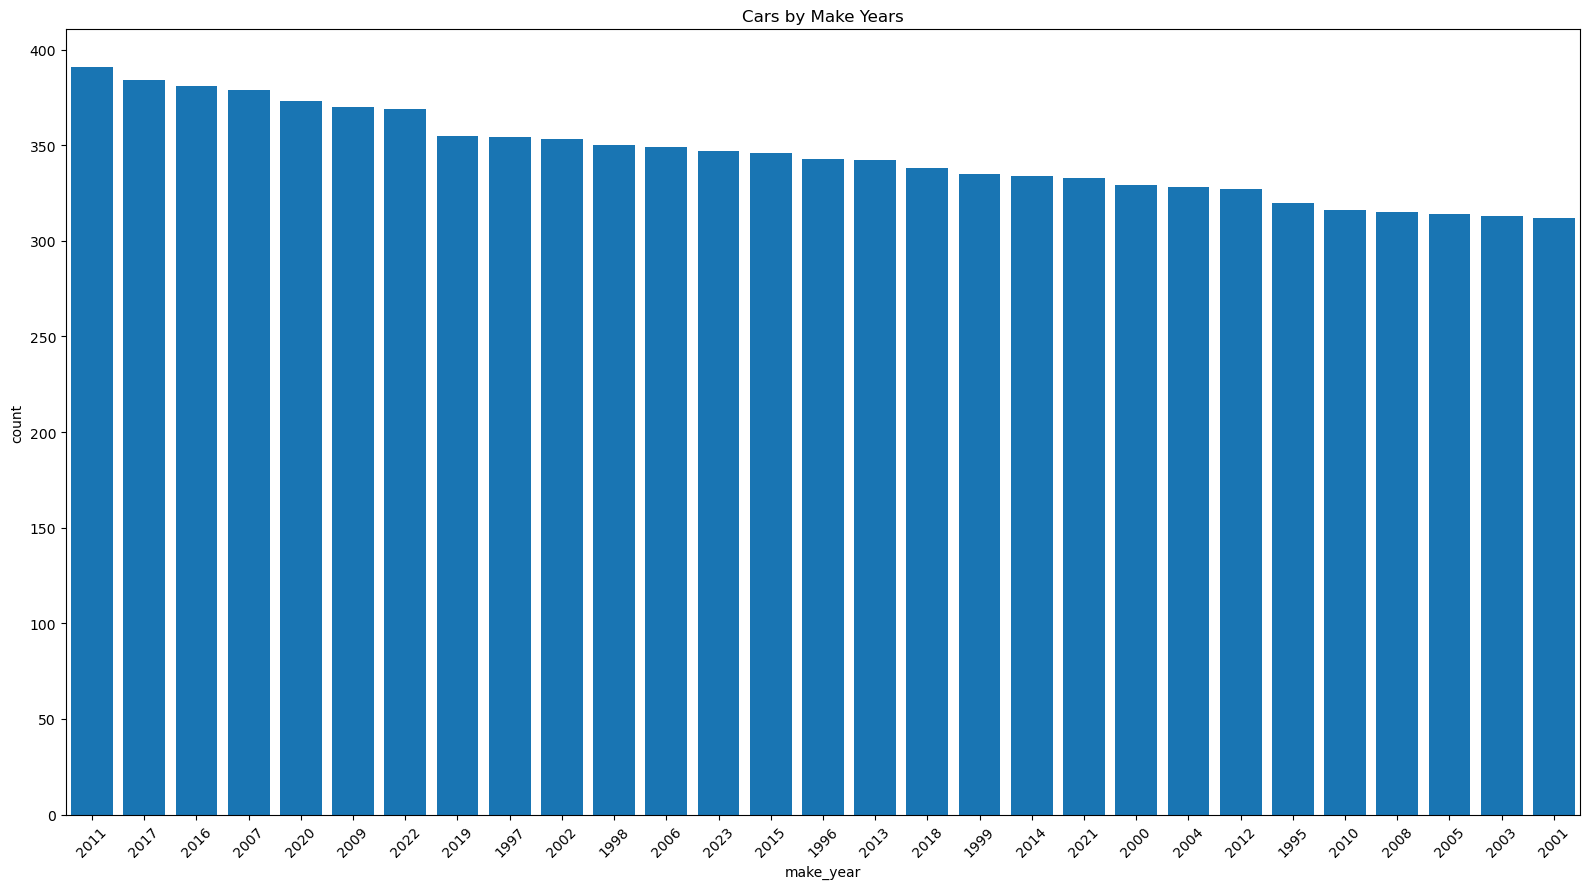

In [364]:
# EDA

plt.figure(figsize=(16, 9))
plt.title('Cars by Make Years')
sns.countplot(
    data=df,
    x='make_year',
    order=df['make_year'].value_counts().index,
    color='#007acc' 
)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

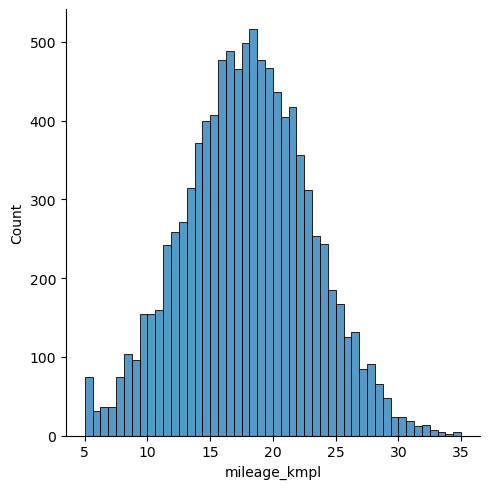

In [366]:
sns.displot(data=df, x = 'mileage_kmpl')

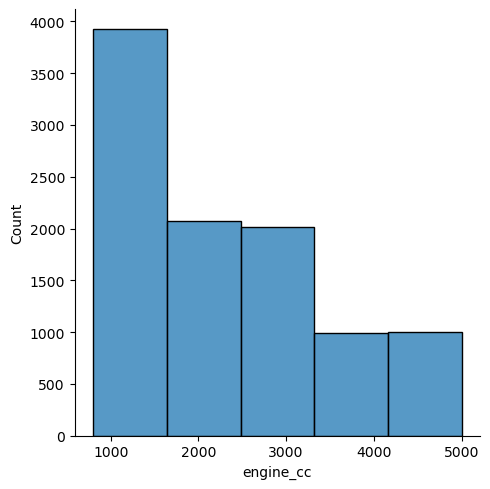

In [368]:
sns.displot(data=df, x='engine_cc',bins =5)

([<matplotlib.patches.Wedge at 0x1fc1162b680>,
 [Text(-0.7155017148292534, -0.8354982322401394, 'Petrol'),
  Text(0.9339499628401705, 0.5811518449689758, 'Diesel'),
  Text(-0.5905114367747535, 0.9280604738044912, 'Electric')],
 [Text(-0.39027366263413815, -0.4557263084946214, '49.7%'),
  Text(0.5094272524582748, 0.3169919154376231, '40.6%'),
  Text(-0.32209714733168365, 0.5062148038933587, '9.7%')])

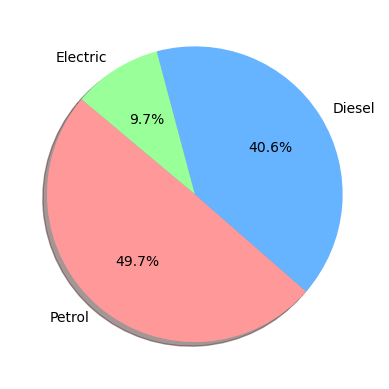

In [370]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']  # just an example
plt.pie(fuel_percentages, labels=fuel_percentages.index, autopct='%1.1f%%', 
        startangle=140, shadow=True, colors=colors)

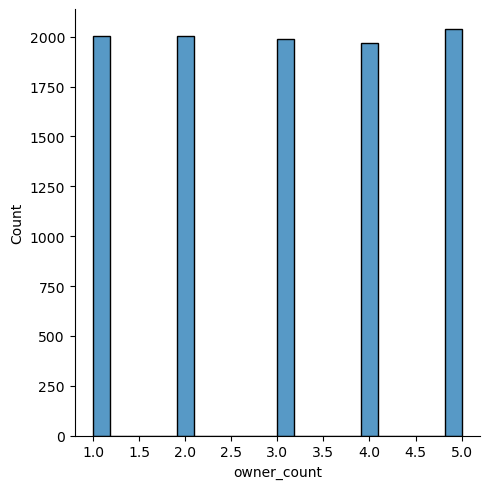

In [372]:
sns.displot(data=df, x='owner_count')

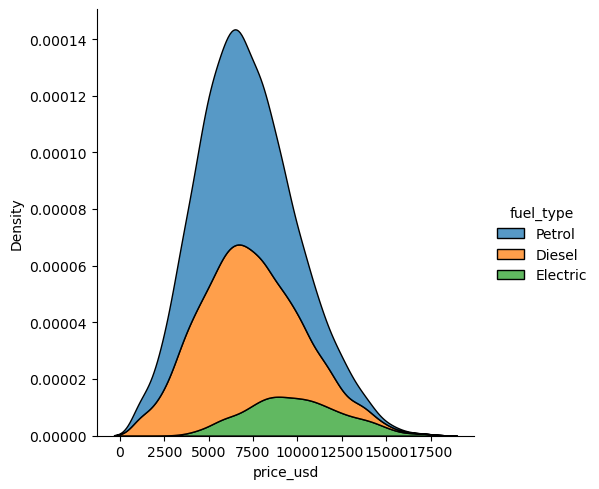

In [374]:
sns.displot(data=df, x='price_usd' ,hue = 'fuel_type', kind='kde', multiple= 'stack')

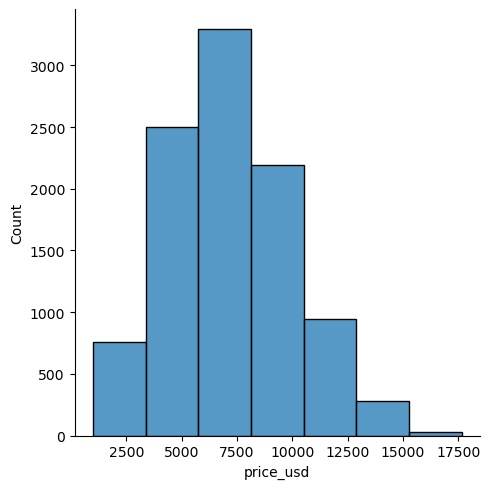

In [376]:
sns.displot(data=df, x='price_usd' , bins=7)

<Axes: xlabel='brand', ylabel='count'>

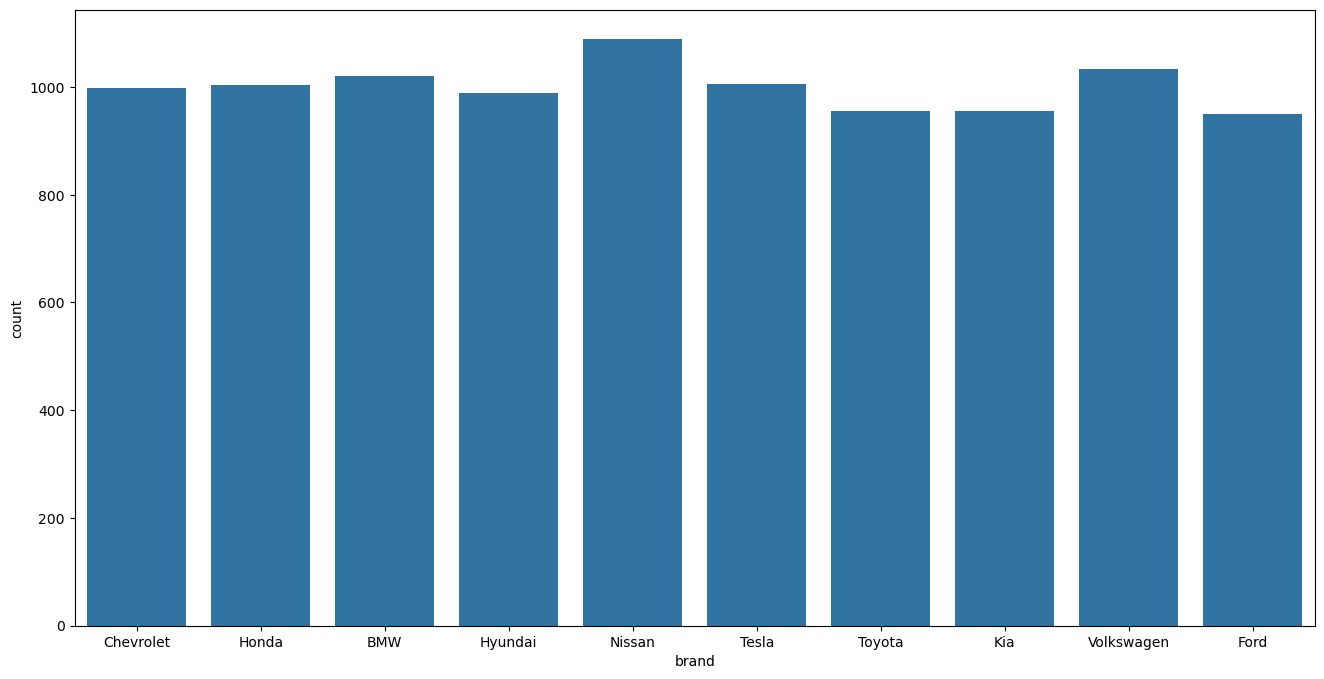

In [378]:
plt.figure(figsize=(16,8))
sns.countplot(data=df,x='brand')

<Axes: xlabel='transmission', ylabel='count'>

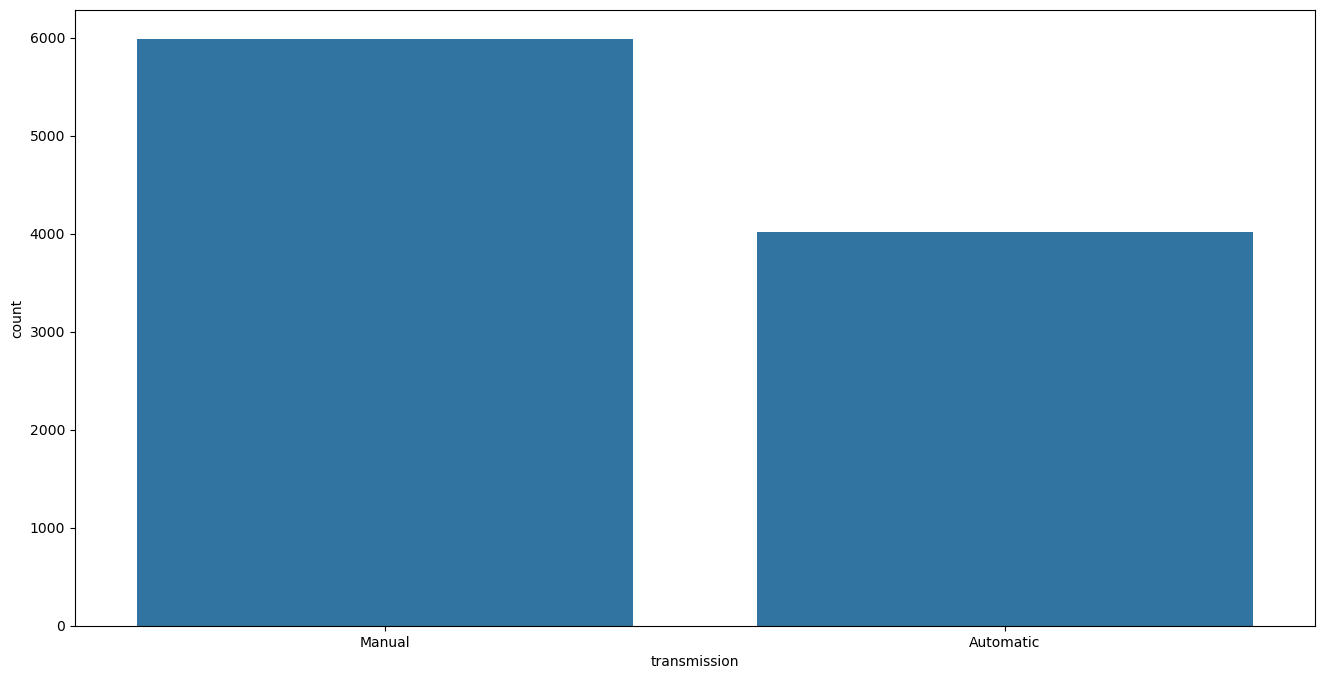

In [380]:
plt.figure(figsize=(16,8))
sns.countplot(data=df,x='transmission')

<Axes: xlabel='service_history', ylabel='count'>

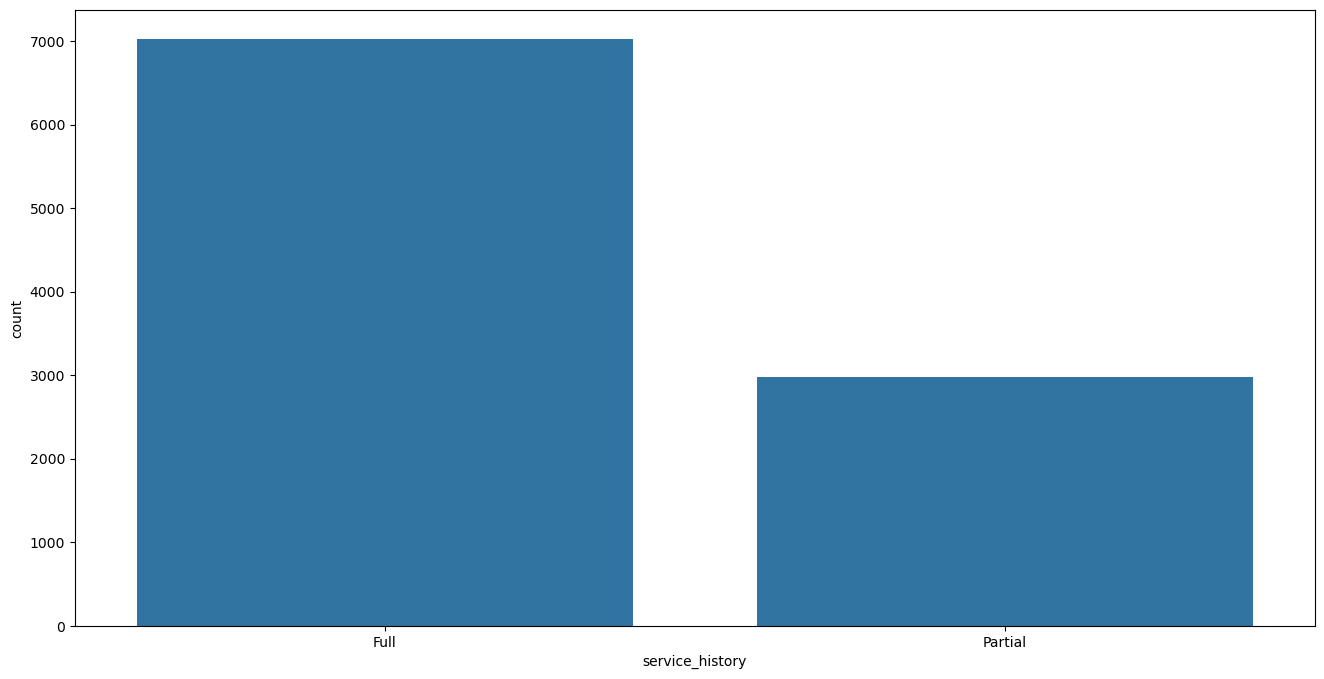

In [382]:
plt.figure(figsize=(16,8))
sns.countplot(data=df,x='service_history')

C:\Users\yuvar\AppData\Local\Temp\ipykernel_23164\159494719.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


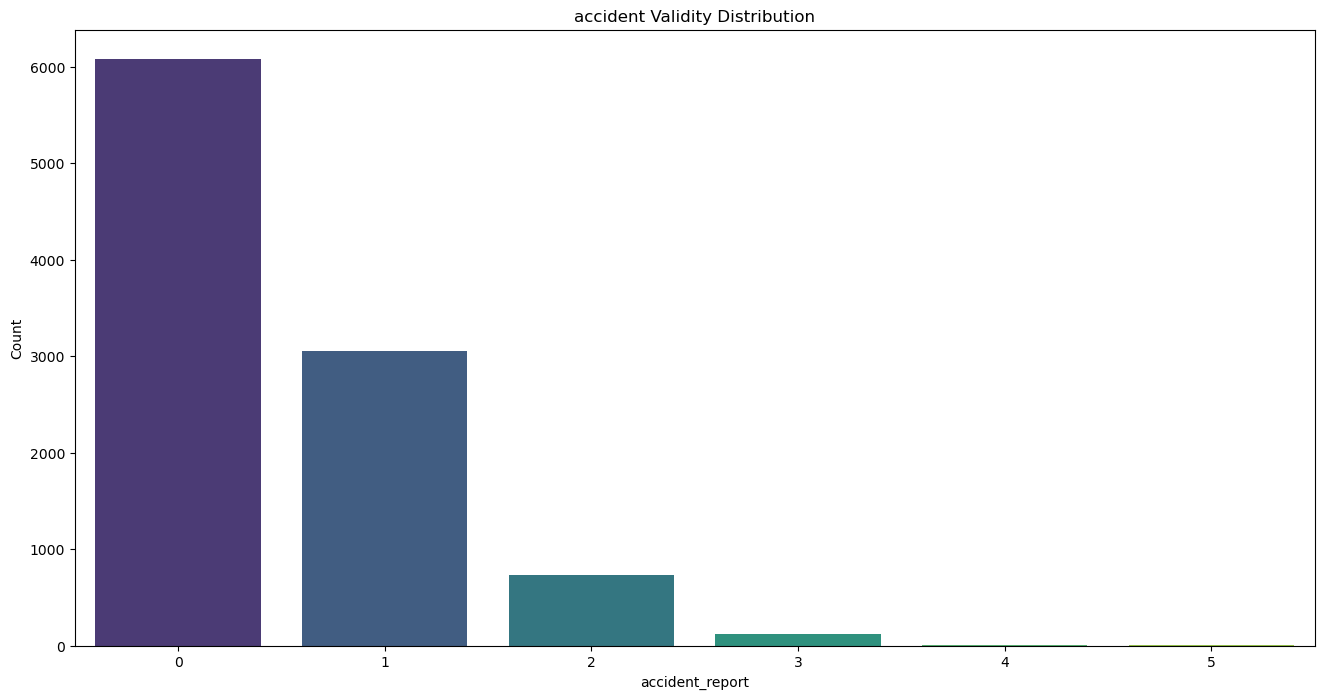

In [392]:
plt.figure(figsize=(16,8))
sns.countplot(
    data=df,
    x='accidents_reported',
    order=df['accidents_reported'].value_counts().index,  
    palette='viridis'
)
plt.title('accident Validity Distribution')
plt.xlabel('accident_report')
plt.ylabel('Count')
plt.show()

C:\Users\yuvar\AppData\Local\Temp\ipykernel_23164\2836911008.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


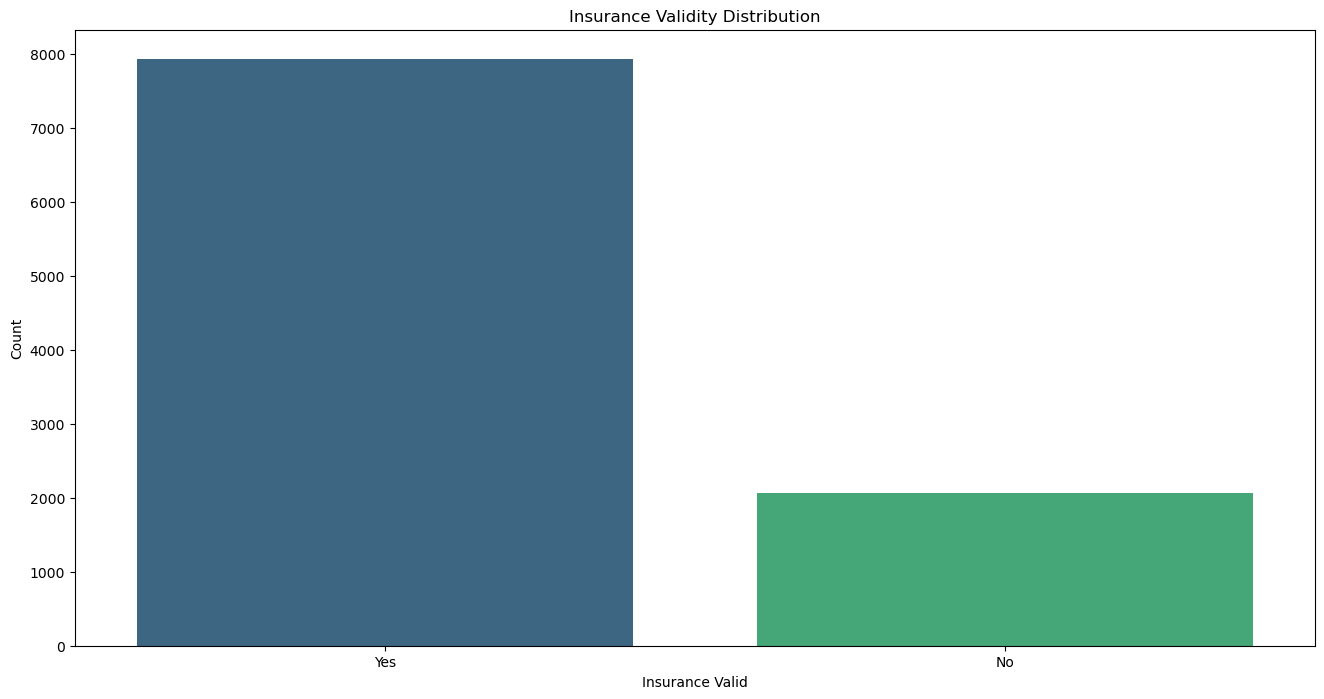

In [394]:
plt.figure(figsize=(16,8))
sns.countplot(
    data=df,
    x='insurance_valid',
    order=df['insurance_valid'].value_counts().index,  
    palette='viridis'
)
plt.title('Insurance Validity Distribution')
plt.xlabel('Insurance Valid')
plt.ylabel('Count')
plt.show()

In [402]:
df['insurance_valid'].value_counts()

insurance_valid
Yes    7934
No     2066
Name: count, dtype: int64

In [404]:
df['service_history'].unique()

array(['Full', 'Partial'], dtype=object)

In [406]:
df.columns

Index(['make_year', 'mileage_kmpl', 'engine_cc', 'fuel_type', 'owner_count',
       'price_usd', 'brand', 'transmission', 'color', 'service_history',
       'accidents_reported', 'insurance_valid'],
      dtype='object')

In [408]:
df = df.drop(columns = ['owner_count','accidents_reported','color', 'service_history', 'insurance_valid'])

In [410]:
df.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,price_usd,brand,transmission
0,2001,8.17,4000,Petrol,8587.64,Chevrolet,Manual
1,2014,17.59,1500,Petrol,5943.50,Honda,Manual
2,2023,18.09,2500,Diesel,9273.58,BMW,Automatic
3,2009,11.28,800,Petrol,6836.24,Hyundai,Manual
4,2005,12.23,1000,Petrol,4625.79,Nissan,Automatic


<Axes: xlabel='mileage_kmpl'>

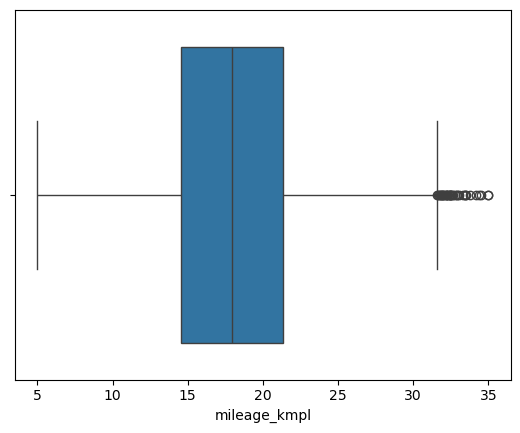

In [412]:
sns.boxplot(data=df, x='mileage_kmpl')

In [414]:
Q1 = df['mileage_kmpl'].quantile(0.10)
Q2 = df['mileage_kmpl'].quantile(0.35)
Q3 = df['mileage_kmpl'].quantile(0.50)

IQR = Q3-Q1
lower_limit = Q1-1.5 *IQR
upper_limit = Q3+1.5 *IQR
print(lower_limit)
print(upper_limit)

1.742500000000005
27.706499999999995


In [416]:
from feature_engine.outliers import ArbitraryOutlierCapper

arb = ArbitraryOutlierCapper(
    min_capping_dict={'mileage_kmpl': 1.742500000000005},
    max_capping_dict={'mileage_kmpl': 27.706499999999995}
)

df[['mileage_kmpl']] = arb.fit_transform(df[['mileage_kmpl']])

<Axes: xlabel='mileage_kmpl'>

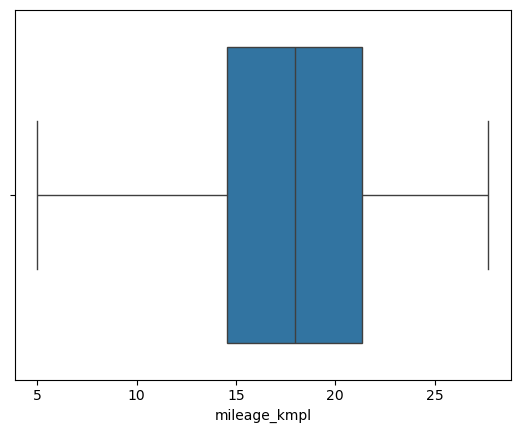

In [418]:
sns.boxplot(data = df, x = 'mileage_kmpl')

In [420]:
df.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,price_usd,brand,transmission
0,2001,8.17,4000,Petrol,8587.64,Chevrolet,Manual
1,2014,17.59,1500,Petrol,5943.50,Honda,Manual
2,2023,18.09,2500,Diesel,9273.58,BMW,Automatic
3,2009,11.28,800,Petrol,6836.24,Hyundai,Manual
4,2005,12.23,1000,Petrol,4625.79,Nissan,Automatic


In [478]:
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score,KFold,train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pickle

In [480]:
X = df.drop(columns=['price_usd'])
y = df['price_usd']

In [482]:
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [484]:
preprocessor = ColumnTransformer(transformers=[
    ('Ordinal', OrdinalEncoder(), ['fuel_type', 'brand', 'transmission']),
    ('num', StandardScaler(), ['make_year', 'mileage_kmpl', 'engine_cc'])
], remainder='passthrough')

In [486]:
pipeline = Pipeline([
('preprocessor',preprocessor),
('model',XGBRegressor())]
)

In [488]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Ordinal', OrdinalEncoder(),
                                                  ['fuel_type', 'brand',
                                                   'transmission']),
                                                 ('num', StandardScaler(),
                                                  ['make_year', 'mileage_kmpl',
                                                   'engine_cc'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [506]:
y_pred = pipeline.predict(X_test)

In [508]:
r2_score(y_test, y_pred)

0.7752865116996609

In [510]:
mean_absolute_error(y_test,y_pred)

1066.6150257104493

In [512]:
kfold = KFold(n_splits=5,shuffle = True, random_state=42)
cv_results = cross_val_score(pipeline,X, y, cv = kfold, scoring = 'r2')

In [514]:
cv_results.mean()

0.7688087699130859

In [516]:
with open('carprice_model.pkl','wb') as f:
    pickle.dump(pipeline,f)